In [1]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
import keras

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.model_selection import cross_val_score

import abc
import numpy as np

import pandas as pd
import abc
import re
import nltk
from sklearn import model_selection 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [4]:

import time
import numpy as np

import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import accuracy_score

In [5]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional , GRU , RepeatVector
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import pandas
from keras.models import load_model
from os.path import isfile
import os
from keras.optimizers import Adam
import pickle

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [7]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
import datetime
import pylab as plt
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
#UTIL functions

In [9]:
def getStartEndDateShape(dfz):
    print('---------------------------')   
    print('shape', dfz.shape) 
    try:
        startDate = str(min(dfz['date']))
        endDate = str(max(dfz['date']))
        print('startDate', startDate)
        print('endDate', endDate)

    except:
        print("No Date column")

In [10]:
def getFeaturesAndTargetRemoveDate(_df):
    train_y = _df['Target']
    train = _df.drop(['date','Target'],axis =1)
    return train, train_y

In [11]:
def prepareDataSet(_df):
    _df.date = pd.to_datetime(_df.date)
    train = _df[_df['date'] < pd.to_datetime('2018/06/01')]
    test  = _df[_df['date'] >= pd.to_datetime('2018/06/01')]
    train, train_y = getFeaturesAndTargetRemoveDate(train)
    test, test_y = getFeaturesAndTargetRemoveDate(test)
    return train, train_y,test, test_y

In [12]:
featureDF_nw = pd.read_csv('nw_feature_woText_MSFT.csv')
featureDF_tw = pd.read_csv('tw_feature_woText_MSFT.csv')
featureFI = pd.read_csv('FIwithTargetwithFTT.csv')
bert_featureDF_nw = pd.read_csv('nw_BertVector.csv')
bert_featureDF_tw = pd.read_csv('tw_BertVector_MSFT.csv')

In [13]:
nw_date = featureDF_nw.date.values.tolist()
tw_date = featureDF_tw.date.values.tolist()

In [14]:
bert_featureDF_nw['date'] = nw_date
bert_featureDF_tw['date'] = tw_date

In [15]:
targetAndDateDF = featureFI[['date','Target']]

In [16]:
bert_featureDF_nw.shape

(4020, 769)

In [17]:
#news dataset

In [18]:
result_nw =pd.merge( targetAndDateDF,bert_featureDF_nw, how='right', on='date')
getStartEndDateShape(result_nw)

---------------------------
shape (4020, 770)
startDate 2004/07/21
endDate 2019/03/28


In [19]:
result_nw.sort_values(by='date',inplace=True) 
cols = ['Target']
result_nw[cols] = result_nw[cols].ffill()
result_nw.fillna(0,inplace=True)

In [20]:
#twitter dataset

In [21]:
result_tw =pd.merge( targetAndDateDF,bert_featureDF_tw, how='right', on='date')
getStartEndDateShape(result_tw)

---------------------------
shape (1426, 770)
startDate 2015/05/04
endDate 2019/04/04


In [22]:
result_tw.sort_values(by='date',inplace=True) 
cols = ['Target']
result_tw[cols] = result_tw[cols].ffill()
result_tw.fillna(0,inplace=True)

In [23]:
#combine news and twitter dataset

In [24]:
result_ntw =pd.merge( result_tw.drop(['Target'], axis=1),result_nw.drop(['Target'], axis=1), how='outer', on='date')
getStartEndDateShape(result_ntw)

---------------------------
shape (4423, 1537)
startDate 2004/07/21
endDate 2019/04/04


In [25]:
result_ntw =pd.merge( targetAndDateDF,result_ntw, how='right', on='date')
getStartEndDateShape(result_ntw)

---------------------------
shape (4423, 1538)
startDate 2004/07/21
endDate 2019/04/04


In [26]:
result_ntw.sort_values(by='date',inplace=True) 
cols = ['Target']
result_ntw[cols] = result_ntw[cols].ffill()
result_ntw.fillna(0,inplace=True)

In [25]:
#ML models 

In [27]:
# Naive Bayes for Baseline
from sklearn.naive_bayes import GaussianNB
def NaiveBayes(train_features , train_labels, test_features,test_labels):
    gnb = GaussianNB()
    y_pred = gnb.fit(train_features, train_labels).predict(test_features)
    print('accuracy_score',accuracy_score(y_pred, test_labels))
    print('classification_score\n',classification_report(y_pred, test_labels))
    

In [26]:
def cCMatrixAccRF(train_features , train_labels, test_features,test_labels, features, dispImpOfFeature = True):
#         train_features, test_features, train_labels, test_labels= model_selection.train_test_split( featureDF , targetValue, test_size=0.1, random_state=0)

        rf_model =RandomForestClassifier(n_estimators=5000, max_depth=4,random_state=0)
        rf_model.fit(train_features, train_labels)
        y_predicted=rf_model.predict(test_features)
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++' )
        
        print('confusion_matrix',confusion_matrix(y_true=test_labels, y_pred=y_predicted))
        print('number of datapoints in Up Class', test_labels.value_counts()[1])
        print('number of datapoints in Down Class', test_labels.value_counts()[0])
        print('accuracy_score',accuracy_score(y_predicted, test_labels))
        print('classification_score\n',classification_report(y_predicted, test_labels))
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#         return rf_model.predict(train_features),rf_model.predict(test_features)

In [27]:
def cCMatrixAccAdaboost(train_features , train_labels, test_features,test_labels):
#         train_features, test_features, train_labels, test_labels= model_selection.train_test_split( featureDF , targetValue, test_size=0.1, random_state=0)

        abc_model =AdaBoostClassifier(n_estimators=5000, random_state=0)
        abc_model.fit(train_features, train_labels)
        y_predicted=abc_model.predict(test_features)
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++' )
        
        print('confusion_matrix',confusion_matrix(y_true=test_labels, y_pred=y_predicted))
        print('number of datapoints in Up Class', test_labels.value_counts()[1])
        print('number of datapoints in Down Class', test_labels.value_counts()[0])
        print('accuracy_score',accuracy_score(y_predicted, test_labels))
        print('classification_score\n',classification_report(y_predicted, test_labels))
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

In [28]:
def cCMatrixAccGradientTreeBosting(train_features , train_labels, test_features,test_labels):
#         train_features, test_features, train_labels, test_labels= model_selection.train_test_split( featureDF , targetValue, test_size=0.1, random_state=0)

        gbc_model =GradientBoostingClassifier(n_estimators=5000, learning_rate=1.0, max_depth=4,random_state=0)
        gbc_model.fit(train_features, train_labels)
        y_predicted=gbc_model.predict(test_features)
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++' )
        
        print('confusion_matrix',confusion_matrix(y_true=test_labels, y_pred=y_predicted))
        print('number of datapoints in Up Class', test_labels.value_counts()[1])
        print('number of datapoints in Down Class', test_labels.value_counts()[0])
        print('accuracy_score',accuracy_score(y_predicted, test_labels))
        print('classification_score\n',classification_report(y_predicted, test_labels))
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

In [29]:
def cCMatrixAccXGB(X_train , y_train, X_test,y_test):
    
    regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.01)

    xgbModel = regressor.fit(X_train,y_train)

    y_predicted = xgbModel.predict(X_test)
    y_predicted_binary = [1 if yp >=0.5 else 0 for yp in y_predicted] # (y_predicted > 0.5)

    print ('Model accuracy = %.3f' % accuracy_score(y_test,y_predicted_binary))

    print('classification_score\n',classification_report(y_test, y_predicted_binary))
#     return y_predicted_binary

In [30]:
def cCMatrixAccVotingClasifier(train_features , train_labels, test_features,test_labels):

        rf_model =RandomForestClassifier(n_estimators=5000, max_depth=4,random_state=0)
        abc_model =AdaBoostClassifier(n_estimators=5000, random_state=0)
        gbc_model =GradientBoostingClassifier(n_estimators=5000, learning_rate=1.0, max_depth=4,random_state=0)
        lr_model = LogisticRegression(solver='lbfgs', multi_class='ovr',random_state=1)
        gnb_model = GaussianNB()
        
        eclf = VotingClassifier(estimators=[('lr', lr_model), ('rf', rf_model), ('gnb', gnb_model), ('abc', abc_model), ('gbc', gbc_model)], voting='soft')
        scores = cross_val_score(eclf, train_features, train_labels, cv=5, scoring='accuracy')
        print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), 'Ensemble'))
#         for clf, label in zip([lr_model, rf_model, gnb_model,abc_model,gbc_model, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'AdaBoostClassifier','GradientBoostingClassifier','Ensemble']):
#             scores = cross_val_score(clf, train_features, train_labels, cv=5, scoring='accuracy')
#             print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

In [31]:
#DL models 

In [32]:
n_epoch=200

In [33]:
def DenseNetwork(featureLength):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Dense(100,activation='relu',input_dim=featureLength,kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3, noise_shape=None, seed=None))

    #Hidden Layer-2
    model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3, noise_shape=None, seed=None))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [34]:
def CNN_LSTMNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(LSTM(100))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [35]:
def RNNNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(keras.layers.SimpleRNN(100, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))
    
    #Hidden Layer-2
    model.add(RepeatVector(1))
    
    #Hidden Layer-3
    model.add(keras.layers.SimpleRNN(100, return_sequences=True))

    #Output layer
    model.add(keras.layers.TimeDistributed(Dense(1,activation='sigmoid')))
#     model.summary()
    return model

In [36]:
def CNN_RNNNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(keras.layers.SimpleRNN(100, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [37]:
def CNN_GRUNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(GRU(100))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [38]:
def CNN_BideirectionalLSTMNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(Bidirectional(LSTM(100)))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [39]:
def evaluateModelAndTestAccuracy(model,trainX, trainY, testX, testY,n_epoch):
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainY, epochs=n_epoch, validation_split=0.1,batch_size=256, verbose=1,)
    
    results = model.evaluate(testX, testY)
    
    y_pred = model.predict_classes(testX)
    print("Evaluation on test data: Loss - {0},  Acurracy - {1}".format(results[0],str(results[1]*100)))
    print('classification_score\n',classification_report(y_pred, testY))
    
    return history

In [40]:
def vizModelMetric(history,n_epoch):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, n_epoch), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, n_epoch), history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, n_epoch), history.history["acc"], label="train_acc")
    plt.plot(np.arange(0, n_epoch), history.history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

In [41]:
def NaivePredition(y_test):
    
    y_testCheck = y_test.copy()
    y_pred = list()
    
    for counter in range(len(y_testCheck)-1):
        y_pred.append(y_testCheck[counter])
    
    y_testCheck = y_testCheck[1:]
    print ('Model accuracy = %.3f' % accuracy_score(y_pred,y_testCheck))

    print('classification_score\n',classification_report(y_pred, y_testCheck))

In [42]:
# Building ML model -News

In [43]:
train, train_y,test, test_y = prepareDataSet(result_nw)
print('train',train.shape,'test',test.shape,'train_y',len(train_y),'test_y',len(test_y))

train (3806, 768) test (214, 768) train_y 3806 test_y 214


In [44]:
NaivePredition(list(test_y))

Model accuracy = 0.756
classification_score
               precision    recall  f1-score   support

         0.0       0.74      0.74      0.74       100
         1.0       0.77      0.77      0.77       113

   micro avg       0.76      0.76      0.76       213
   macro avg       0.75      0.75      0.75       213
weighted avg       0.76      0.76      0.76       213



In [45]:
features = list(train.columns)
cCMatrixAccRF(train , train_y, test,test_y, features)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[13 87]
 [22 92]]
number of datapoints in Up Class 114
number of datapoints in Down Class 100
accuracy_score 0.49065420560747663
classification_score
               precision    recall  f1-score   support

         0.0       0.13      0.37      0.19        35
         1.0       0.81      0.51      0.63       179

   micro avg       0.49      0.49      0.49       214
   macro avg       0.47      0.44      0.41       214
weighted avg       0.70      0.49      0.56       214

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [47]:
cCMatrixAccAdaboost(train , train_y, test,test_y)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[39 61]
 [51 63]]
number of datapoints in Up Class 114
number of datapoints in Down Class 100
accuracy_score 0.4766355140186916
classification_score
               precision    recall  f1-score   support

         0.0       0.39      0.43      0.41        90
         1.0       0.55      0.51      0.53       124

   micro avg       0.48      0.48      0.48       214
   macro avg       0.47      0.47      0.47       214
weighted avg       0.48      0.48      0.48       214

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [48]:
cCMatrixAccGradientTreeBosting(train , train_y, test,test_y)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[42 58]
 [46 68]]
number of datapoints in Up Class 114
number of datapoints in Down Class 100
accuracy_score 0.514018691588785
classification_score
               precision    recall  f1-score   support

         0.0       0.42      0.48      0.45        88
         1.0       0.60      0.54      0.57       126

   micro avg       0.51      0.51      0.51       214
   macro avg       0.51      0.51      0.51       214
weighted avg       0.52      0.51      0.52       214

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [51]:
cCMatrixAccVotingClasifier(train , train_y, test,test_y)

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs 

Accuracy: 0.50 (+/- 0.02) [Ensemble]


In [52]:
cCMatrixAccXGB(train , train_y, test,test_y)

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Model accuracy = 0.537
classification_score
               precision    recall  f1-score   support

         0.0       0.56      0.05      0.09       100
         1.0       0.54      0.96      0.69       114

   micro avg       0.54      0.54      0.54       214
   macro avg       0.55      0.51      0.39       214
weighted avg       0.55      0.54      0.41       214



In [50]:
# Building DL model -NEWS
inputFeatures = train.shape[1]
n_epoch = 100

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               76900     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 87,101
Trainable params: 87,101
Non-trainable params: 0
_________________________________________________________________
Train on 3425 samples, validate on 381 samples
Epoch 1/100
3425/3425 [==============================] - 1s 239us/step - loss: 3.1440 - acc

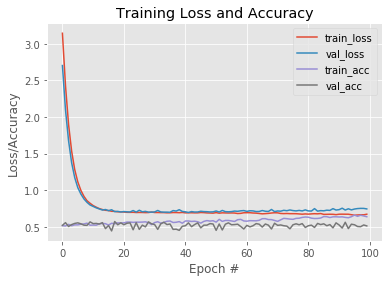

In [48]:
vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(inputFeatures),train, train_y, test, test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 3425 samples, validate on 381 samples
Epoch 1/100
3425/3425 [==============================] - 15s 5ms/step - loss: 0.6944 - acc: 0.4964 - val_loss: 0.6909 - val_acc: 0.5617
Epoch 2/100
3425/3425 [==============================] - 13s 4ms/step - loss: 0.6930 - 

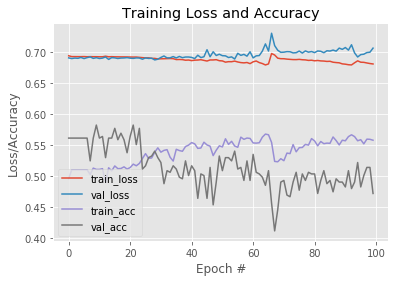

In [54]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_LSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 201       
Total params: 106,729
Trainable params: 106,729
Non-trainable params: 0
_________________________________________________________________
Train on 3425 samples, validate on 381 samples
Epoch 1/100
3425/3425 [==============================] - 25s 7ms/step - loss: 0.6934 - acc: 0.4990 - val_loss: 0.6888 - val_acc: 0.5617
Epoch 2/100
3425/3425 [==============================] - 23s 7ms/step - loss: 0.6930 

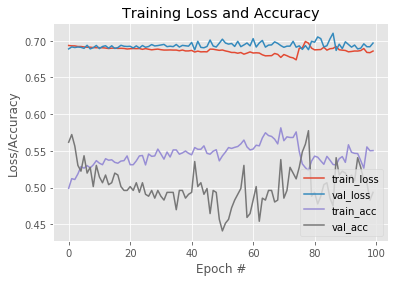

In [55]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 40,129
Trainable params: 40,129
Non-trainable params: 0
_________________________________________________________________
Train on 3425 samples, validate on 381 samples
Epoch 1/100
3425/3425 [==============================] - 10s 3ms/step - loss: 0.6931 - acc: 0.5089 - val_loss: 0.6907 - val_acc: 0.5617
Epoch 2/100
3425/3425 [==============================] - 9s 3ms/step - loss: 0.6932 - a

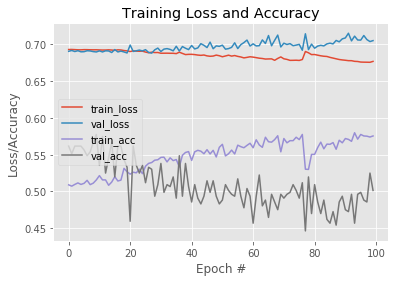

In [56]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 13,529
Trainable params: 13,529
Non-trainable params: 0
_________________________________________________________________
Train on 3425 samples, validate on 381 samples
Epoch 1/100
3425/3425 [==============================] - 5s 2ms/step - loss: 0.6987 - acc: 0.5127 - val_loss: 0.6943 - val_acc: 0.5066
Epoch 2/100
3425/3425 [==============================] - 4s 1ms/step - loss: 0.6912 - ac

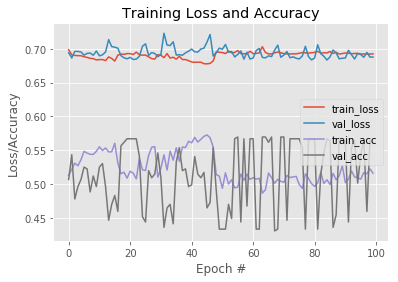

In [60]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

In [ ]:
# Building ML model -Twitter

In [61]:
train, train_y,test, test_y = prepareDataSet(result_tw)
print('train',train.shape,'test',test.shape,'train_y',len(train_y),'test_y',len(test_y))

train (1118, 768) test (308, 768) train_y 1118 test_y 308


In [62]:
NaivePredition(list(test_y))

Model accuracy = 0.811
classification_score
               precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       139
         1.0       0.83      0.83      0.83       168

   micro avg       0.81      0.81      0.81       307
   macro avg       0.81      0.81      0.81       307
weighted avg       0.81      0.81      0.81       307



In [63]:
features = list(train.columns)
cCMatrixAccRF(train , train_y, test,test_y, features)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[  4 135]
 [  9 160]]
number of datapoints in Up Class 169
number of datapoints in Down Class 139
accuracy_score 0.5324675324675324
classification_score
               precision    recall  f1-score   support

         0.0       0.03      0.31      0.05        13
         1.0       0.95      0.54      0.69       295

   micro avg       0.53      0.53      0.53       308
   macro avg       0.49      0.43      0.37       308
weighted avg       0.91      0.53      0.66       308

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [64]:
cCMatrixAccAdaboost(train , train_y, test,test_y)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[62 77]
 [70 99]]
number of datapoints in Up Class 169
number of datapoints in Down Class 139
accuracy_score 0.5227272727272727
classification_score
               precision    recall  f1-score   support

         0.0       0.45      0.47      0.46       132
         1.0       0.59      0.56      0.57       176

   micro avg       0.52      0.52      0.52       308
   macro avg       0.52      0.52      0.52       308
weighted avg       0.53      0.52      0.52       308

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [65]:
cCMatrixAccGradientTreeBosting(train , train_y, test,test_y)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[ 66  73]
 [ 59 110]]
number of datapoints in Up Class 169
number of datapoints in Down Class 139
accuracy_score 0.5714285714285714
classification_score
               precision    recall  f1-score   support

         0.0       0.47      0.53      0.50       125
         1.0       0.65      0.60      0.62       183

   micro avg       0.57      0.57      0.57       308
   macro avg       0.56      0.56      0.56       308
weighted avg       0.58      0.57      0.57       308

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [66]:
cCMatrixAccVotingClasifier(train , train_y, test,test_y)

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs 

Accuracy: 0.48 (+/- 0.03) [Ensemble]


In [67]:
cCMatrixAccXGB(train , train_y, test,test_y)

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Model accuracy = 0.539
classification_score
               precision    recall  f1-score   support

         0.0       0.40      0.04      0.08       139
         1.0       0.55      0.95      0.69       169

   micro avg       0.54      0.54      0.54       308
   macro avg       0.47      0.49      0.39       308
weighted avg       0.48      0.54      0.42       308



In [68]:
# Building DL model -Twitter

In [69]:
featureLength = train.shape[1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               76900     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 87,101
Trainable params: 87,101
Non-trainable params: 0
_________________________________________________________________
Train on 1006 samples, validate on 112 samples
Epoch 1/100
1006/1006 [==============================] - 1s 1ms/step - loss: 3.4096 - acc: 

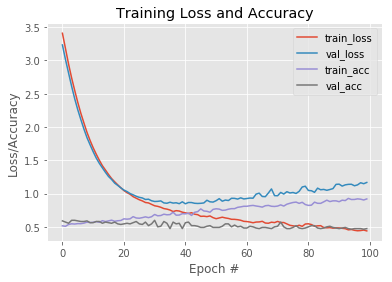

In [70]:
vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(featureLength),train, train_y, test, test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 1006 samples, validate on 112 samples
Epoch 1/100
1006/1006 [==============================] - 5s 5ms/step - loss: 0.6917 - acc: 0.5447 - val_loss: 0.6813 - val_acc: 0.5893
Epoch 2/100
1006/1006 [==============================] - 3s 3ms/step - loss: 0.6890 - ac

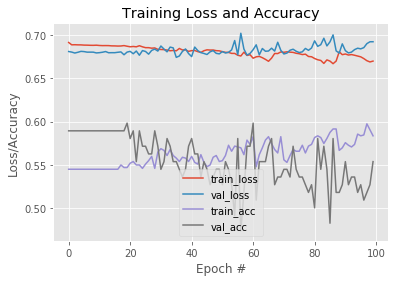

In [71]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_LSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 201       
Total params: 106,729
Trainable params: 106,729
Non-trainable params: 0
_________________________________________________________________
Train on 1006 samples, validate on 112 samples
Epoch 1/100
1006/1006 [==============================] - 6s 6ms/step - loss: 0.6917 - acc: 0.5447 - val_loss: 0.6780 - val_acc: 0.5893
Epoch 2/100
1006/1006 [==============================] - 4s 4ms/step - loss: 0.6895 - 

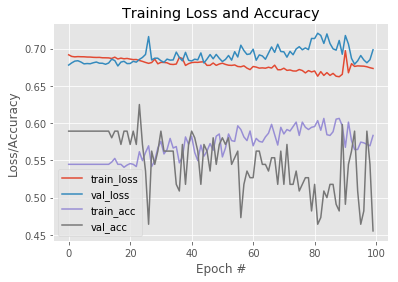

In [72]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 40,129
Trainable params: 40,129
Non-trainable params: 0
_________________________________________________________________
Train on 1006 samples, validate on 112 samples
Epoch 1/100
1006/1006 [==============================] - 4s 4ms/step - loss: 0.6917 - acc: 0.5089 - val_loss: 0.6817 - val_acc: 0.5893
Epoch 2/100
1006/1006 [==============================] - 2s 2ms/step - loss: 0.6905 - ac

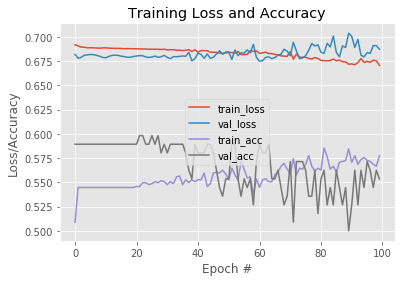

In [73]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 384, 32)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 13,529
Trainable params: 13,529
Non-trainable params: 0
_________________________________________________________________
Train on 1006 samples, validate on 112 samples
Epoch 1/100
1006/1006 [==============================] - 3s 3ms/step - loss: 0.7014 - acc: 0.5328 - val_loss: 0.6805 - val_acc: 0.6071
Epoch 2/100
1006/1006 [==============================] - 1s 1ms/step - loss: 0.6916 - ac

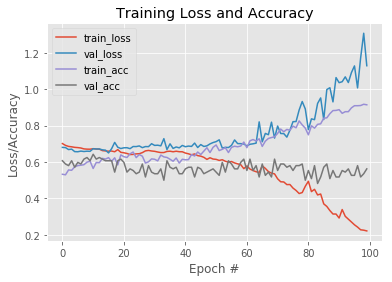

In [74]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

In [75]:
# Building ML model -combine

In [28]:
train, train_y,test, test_y = prepareDataSet(result_ntw)
print('train',train.shape,'test',test.shape,'train_y',len(train_y),'test_y',len(test_y))

train (4115, 1536) test (308, 1536) train_y 4115 test_y 308


In [29]:
NaiveBayes(train,train_y,test,test_y)

accuracy_score 0.5487012987012987
classification_score
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.55      0.71       308

   micro avg       0.55      0.55      0.55       308
   macro avg       0.50      0.27      0.35       308
weighted avg       1.00      0.55      0.71       308



C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [77]:
getStartEndDateShape(result_ntw)

---------------------------
shape (4423, 1538)
startDate 2004-07-21 00:00:00
endDate 2019-04-04 00:00:00


In [78]:
NaivePredition(list(test_y))

Model accuracy = 0.811
classification_score
               precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       139
         1.0       0.83      0.83      0.83       168

   micro avg       0.81      0.81      0.81       307
   macro avg       0.81      0.81      0.81       307
weighted avg       0.81      0.81      0.81       307



In [79]:
features = list(train.columns)
cCMatrixAccRF(train , train_y, test,test_y,"")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[  0 139]
 [  1 168]]
number of datapoints in Up Class 169
number of datapoints in Down Class 139
accuracy_score 0.5454545454545454
classification_score
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.99      0.55      0.71       307

   micro avg       0.55      0.55      0.55       308
   macro avg       0.50      0.27      0.35       308
weighted avg       0.99      0.55      0.70       308

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [80]:
cCMatrixAccXGB(train , train_y, test,test_y)

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Model accuracy = 0.562
classification_score
               precision    recall  f1-score   support

         0.0       0.83      0.04      0.07       139
         1.0       0.56      0.99      0.71       169

   micro avg       0.56      0.56      0.56       308
   macro avg       0.69      0.52      0.39       308
weighted avg       0.68      0.56      0.42       308



In [84]:
# Building DL model -combine
inputFeatures = train.shape[1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               153700    
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 163,901
Trainable params: 163,901
Non-trainable params: 0
_________________________________________________________________
Train on 3703 samples, validate on 412 samples
Epoch 1/100
3703/3703 [==============================] - 2s 430us/step - loss: 3.0772 - a

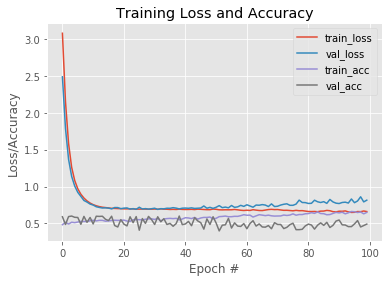

In [82]:
vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(inputFeatures),train, train_y, test, test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 1536, 32)          128       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 768, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 3703 samples, validate on 412 samples
Epoch 1/100
3703/3703 [==============================] - 23s 6ms/step - loss: 0.6945 - acc: 0.4866 - val_loss: 0.6902 - val_acc: 0.5947
Epoch 2/100
3703/3703 [==============================] - 21s 6ms/step - loss: 0.6929 - 

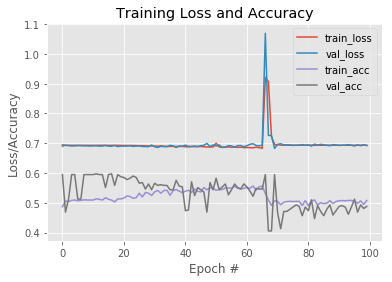

In [85]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_LSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 1536, 32)          128       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 768, 32)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 201       
Total params: 106,729
Trainable params: 106,729
Non-trainable params: 0
_________________________________________________________________
Train on 3703 samples, validate on 412 samples
Epoch 1/100
3703/3703 [==============================] - 34s 9ms/step - loss: 0.6935 - acc: 0.5082 - val_loss: 0.6831 - val_acc: 0.5947
Epoch 2/100
3703/3703 [==============================] - 31s 8ms/step - loss: 0.6930 

3703/3703 [==============================] - 40s 11ms/step - loss: 0.6849 - acc: 0.5485 - val_loss: 0.7156 - val_acc: 0.4782
Epoch 55/100
3703/3703 [==============================] - 40s 11ms/step - loss: 0.6866 - acc: 0.5433 - val_loss: 0.7090 - val_acc: 0.4854
Epoch 56/100
3703/3703 [==============================] - 47s 13ms/step - loss: 0.6846 - acc: 0.5509 - val_loss: 0.6947 - val_acc: 0.5291
Epoch 57/100
3703/3703 [==============================] - 41s 11ms/step - loss: 0.6853 - acc: 0.5525 - val_loss: 0.6993 - val_acc: 0.5024
Epoch 58/100
3703/3703 [==============================] - 40s 11ms/step - loss: 0.6863 - acc: 0.5415 - val_loss: 0.7099 - val_acc: 0.4272
Epoch 59/100
3703/3703 [==============================] - 45s 12ms/step - loss: 0.6854 - acc: 0.5528 - val_loss: 0.6923 - val_acc: 0.5534
Epoch 60/100
3703/3703 [==============================] - 44s 12ms/step - loss: 0.6849 - acc: 0.5579 - val_loss: 0.6912 - val_acc: 0.5655
Epoch 61/100
3703/3703 [=======================

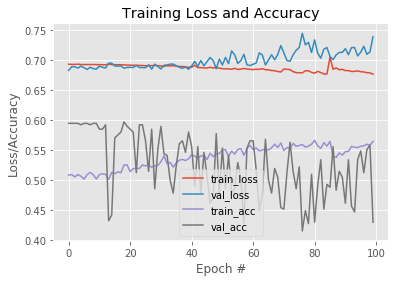

In [86]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 1536, 32)          128       
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 768, 32)           0         
_________________________________________________________________
gru_3 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 101       
Total params: 40,129
Trainable params: 40,129
Non-trainable params: 0
_________________________________________________________________
Train on 3703 samples, validate on 412 samples
Epoch 1/100
3703/3703 [==============================] - 26s 7ms/step - loss: 0.6934 - acc: 0.5061 - val_loss: 0.6912 - val_acc: 0.5121
Epoch 2/100
3703/3703 [==============================] - 24s 6ms/step - loss: 0.6931 - 

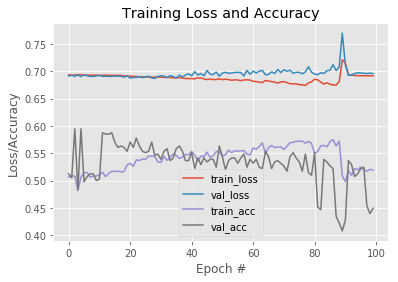

In [87]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 1536, 32)          128       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 768, 32)           0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 101       
Total params: 13,529
Trainable params: 13,529
Non-trainable params: 0
_________________________________________________________________
Train on 3703 samples, validate on 412 samples
Epoch 1/100
3703/3703 [==============================] - 12s 3ms/step - loss: 0.7026 - acc: 0.4972 - val_loss: 0.6942 - val_acc: 0.4709
Epoch 2/100
3703/3703 [==============================] - 9s 3ms/step - loss: 0.6944 - a

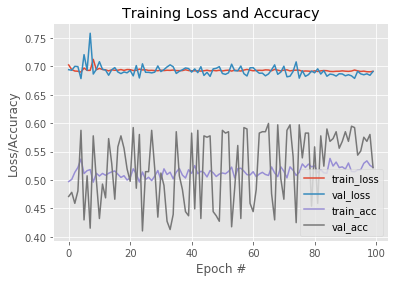

In [88]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)